# Step 2 - Evolution of the Elements in your Milky Way Model

This notebooks presents how to plot the evolution of the elements using OMEGA+.

**Open-source Python packages**
* [NuPyCEE](https://github.com/NuGrid/NuPyCEE) - NuGrid Python Chemical Evolution Environment
* [JINAPyCEE](https://github.com/becot85/JINAPyCEE) - JINA Python Chemical Evolution Environment

In [1]:
# Import the OMEGA+ code and standard packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from JINAPyCEE import omega_plus
from NuPyCEE import sygma

# Your Tasks

* Learn how to look at the contribution of massive stars, low- and intermediate-mass AGB stars, and Type Ia supernovae, on the evolution of a particular element in your galaxy model.
* Isolate the stellar models that are contributing the most to the chemical evolution of a particular element.
* There will be a default target element, but you should explore other elements as well.

### Select your Input Stellar Yields Table

In [2]:
# NuGrid - Ritter et al. (2018) - http://adsabs.harvard.edu/abs/2018MNRAS.480..538R
table = 'yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt'

### Run OMEGA+ with the Input Parameters Defined in Step 1

In [3]:
# Define the input parameters constrained during Step 1
sfe = 0.02
t_star = 1.0e8
in_mag = 1.0

# Run OMEGA+ with your set of parameters (simple Milky Way model)
exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]]
o = omega_plus.omega_plus(sfe=sfe, t_star=t_star, exp_infall=exp_infall, \
                          special_timesteps=90, table=table)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 5.75s
   OMEGA+ run completed - Run time: 5.75s


### Select your Element

In [8]:
# Target element (or isotope)
# Element nomenclature: First letter in capital. e.g., C, N, O, Mg, ..
# Isotope nomenclature: O-16, Fe-56, ..
specie = 'C'

# Verify that the target specie is available
if specie in o.inner.history.elements or specie in o.inner.history.isotopes:
    print('The element/isotope is available.')
else:
    print('Error - The element/isotope IS NOT available, please select a new one.')

The element/isotope is available.


### Plot the Evolution of the Mass of the Selected Element

**Note:** The mass of a given element in the gas reservoir can decrease as a function of time (Galactic age), since star formation continously locks elements inside stars. 

<IPython.core.display.Javascript object>


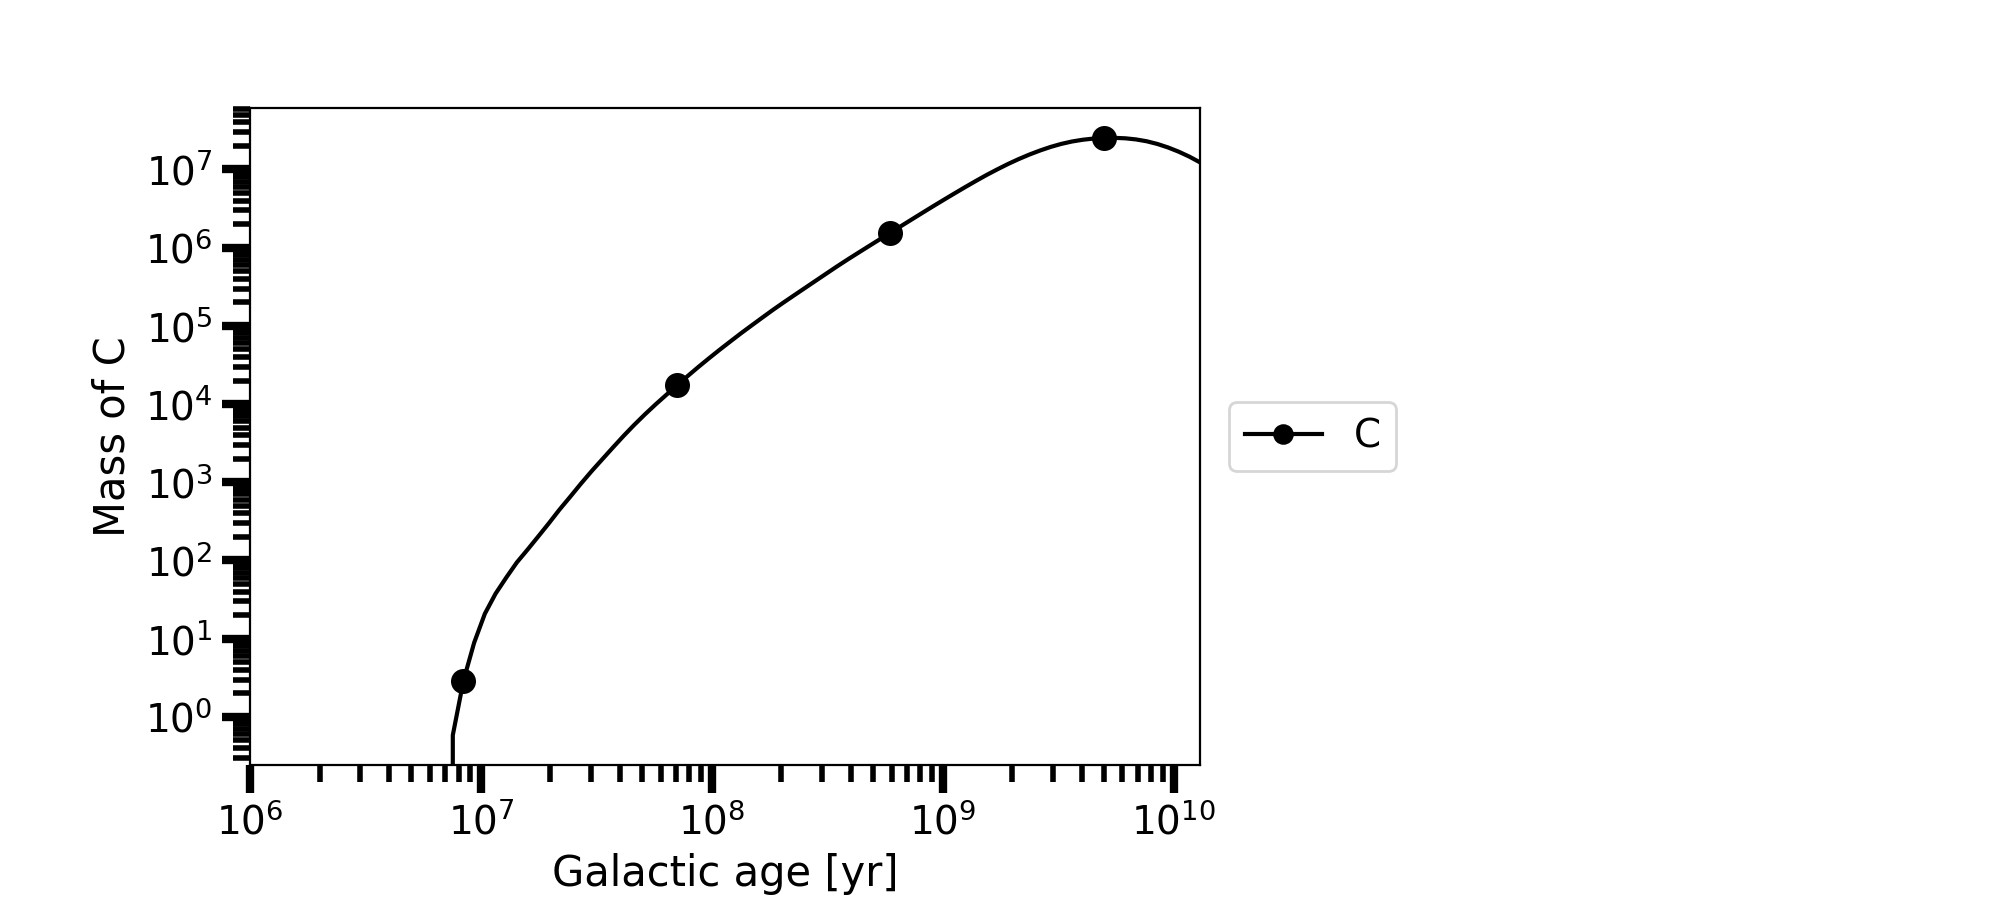

Text(0,0.5,'Mass of C')

In [9]:
%matplotlib nbagg
o.inner.plot_mass(specie=specie)
plt.xlabel('Galactic age [yr]')
plt.ylabel('Mass of '+specie)
#plt.xscale('linear')
#plt.ylim(1e3,6e7)

### Look at the Contribution of Different Sources

<IPython.core.display.Javascript object>


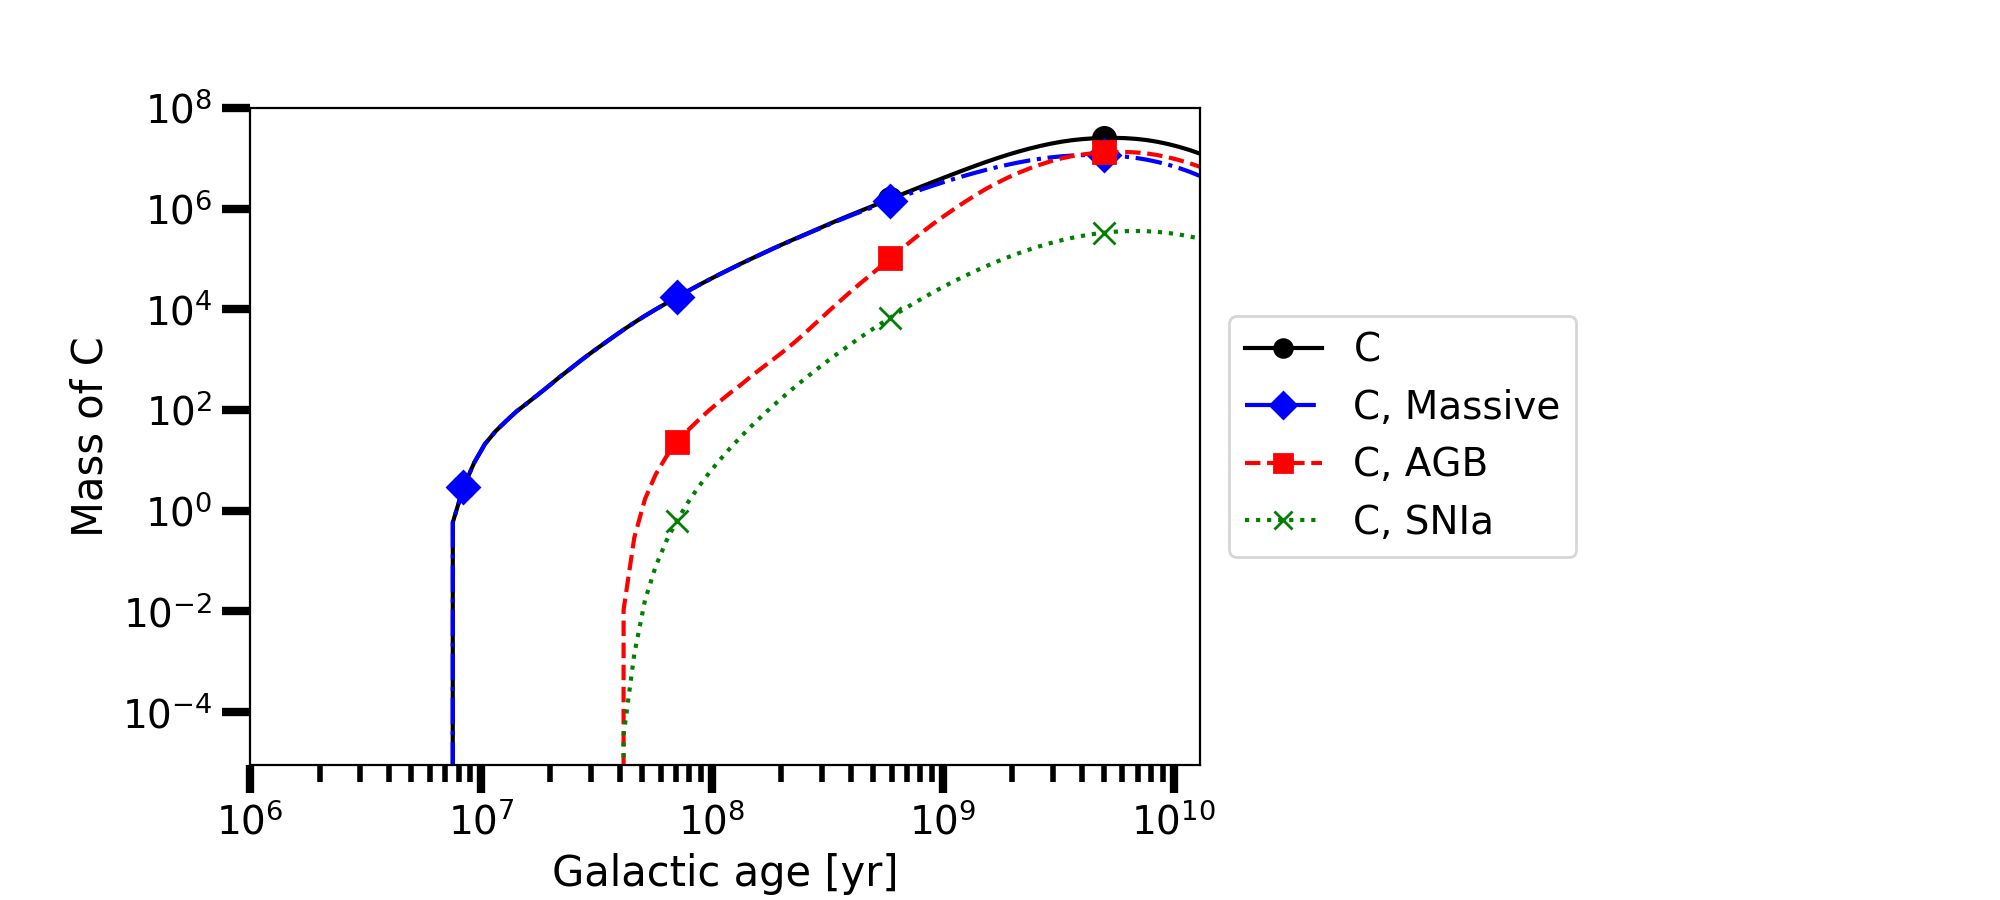

Text(0,0.5,'Mass of C')

In [10]:
%matplotlib nbagg
o.inner.plot_mass(specie=specie)
o.inner.plot_mass(specie=specie, source='massive')
o.inner.plot_mass(specie=specie, source='agb')
o.inner.plot_mass(specie=specie, source='sn1a')
plt.xlabel('Galactic age [yr]')
plt.ylabel('Mass of '+specie)
#plt.xscale('linear')
#plt.ylim(1e3,6e7)

## Questions

* Can you find an element that is significantly produced by **massive stars**?

* Can you find an element that is significantly produced by **AGB stars**?

* Can you find an element that is significantly produced by **Type Ia supernovae**?

# Identify the Important Stellar Models

In this section, you will use SYGMA ([Ritter et al. 2018](http://adsabs.harvard.edu/abs/2018ApJS..237...42R)) to identify which stellar model(s) contribute the most to the production of the target element in your Milky Way model.

**Reminder:** SYGMA is a simple stellar population code that follows the ejecta of a stellar cluster as a function of time. The basic ingredients are the initial mass function, the stellar yields, and the stellar lifetimes. With SYGMA, all stars are formed at the same time, with the same initial chemical composition.

**Reminder:** OMEGA+ is a galaxy code that combines many stellar populations, where each one is created using SYGMA. Each stellar population is distributed in time (Galactic age), according to the star formation history.

In [11]:
# Run SYGMA with two different initial metallicities (Z --> mass fraction)
# These are not a galaxy simulations, they are stellar population simulations.
s_0_01   = sygma.sygma(iniZ=0.01,   table=table)
s_0_0001 = sygma.sygma(iniZ=0.0001, table=table)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.32s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.33s


In [12]:
# Target element (or isotope)
# Element nomenclature: First letter in capital. e.g., C, N, O, Mg, ..
# Isotope nomenclature: O-16, Fe-56, ..
specie = 'C'
# Note: Nitrogen is an interesting one ..

# Verify that the target specie is available
if specie in s_0_01.history.elements or specie in o.inner.history.isotopes:
    print('The element/isotope is available.')
else:
    print('Error - The element/isotope IS NOT available, please select a new one.')

The element/isotope is available.


### Plot the Contribution of the Stellar Models

**Important:** The following plot does not include Type Ia supernovae.

**Note:** The exact values on the y-axis in the following plot is not too important for this exercise. The only important part is that stars with the highest y-axis values are the ones that contribute the most to the chemical evolution of the target element, when using a galaxy code such as OMEGA+.

**Note:** The contribution of each star is weighted by the initial mass function.

<IPython.core.display.Javascript object>


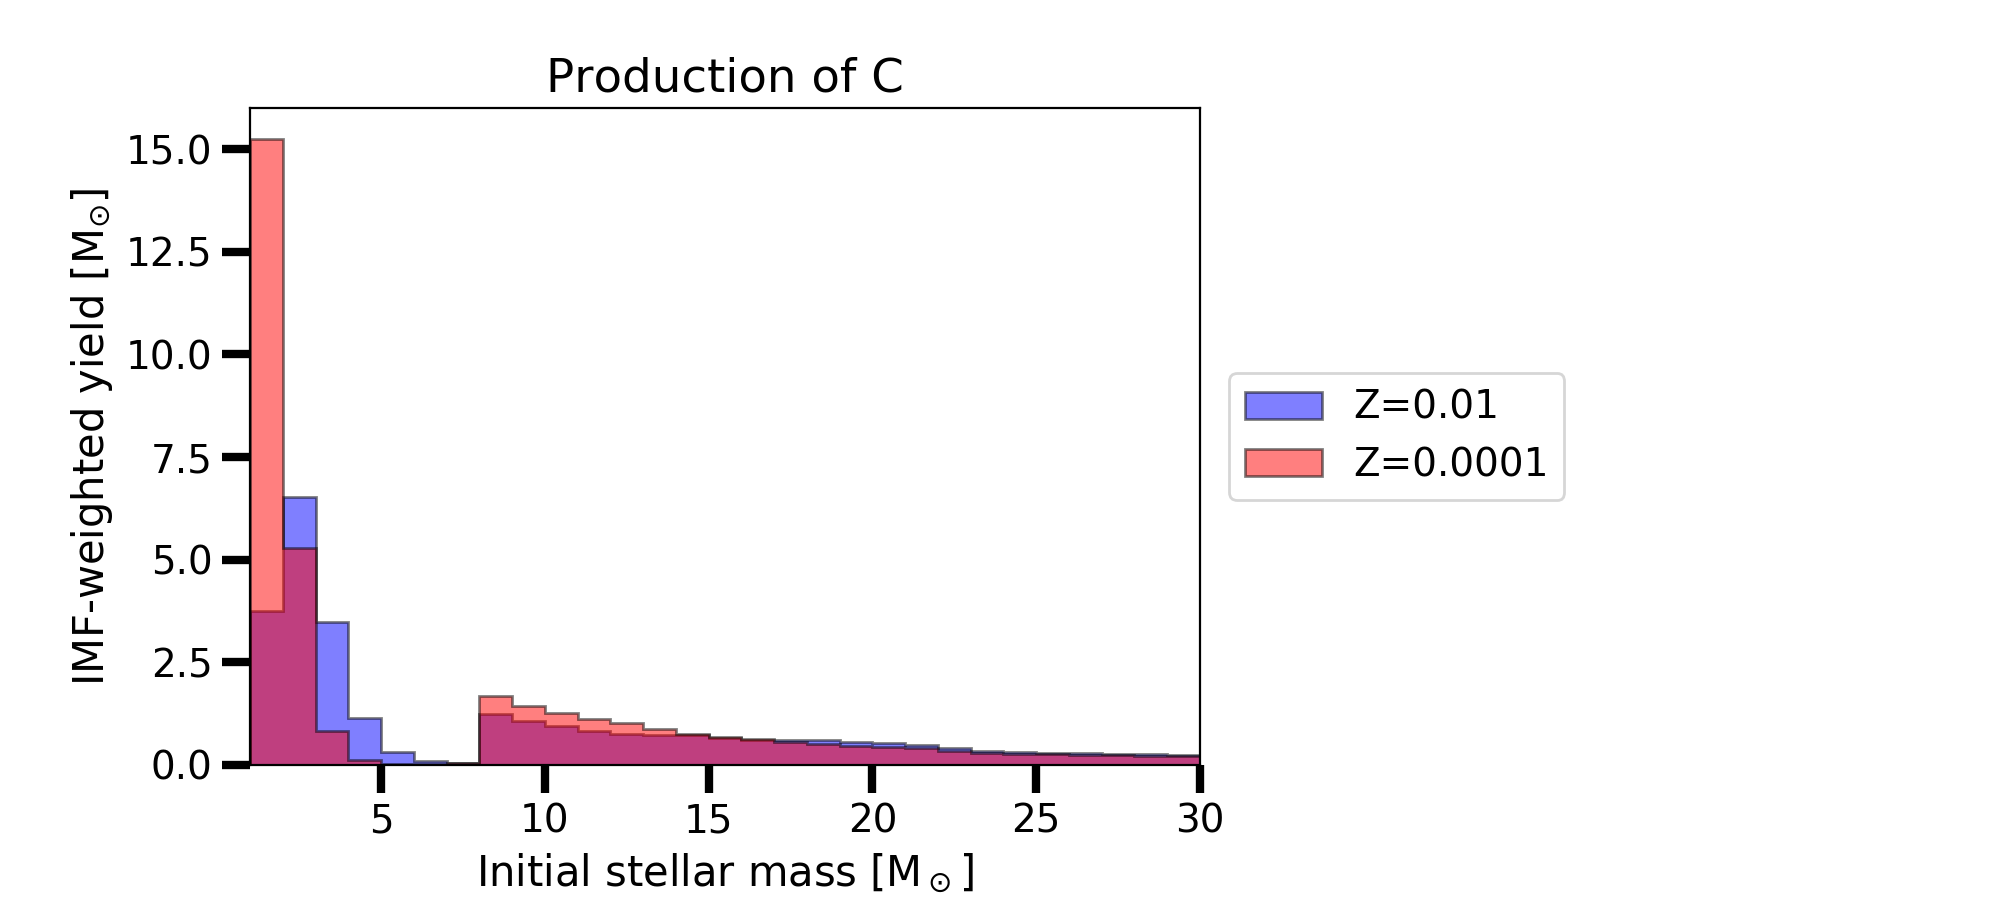

Text(0.5,1,'Production of C')

In [13]:
%matplotlib nbagg
s_0_01.plot_mass_range_contributions(  specie=specie, color='b', label='Z=0.01')
s_0_0001.plot_mass_range_contributions(specie=specie, color='r', label='Z=0.0001')
plt.xlabel('Initial stellar mass [M$_\odot$]')
plt.title('Production of '+specie)

## Exercise

Redo the experiment with different elements or different isotopes.

# ===================
# Extra Material (optional)
# ===================

### Plot the Cumulated Ejected Mass of the Selected Element, for a Stellar Population

**Note:** Because the gas reservoir in SYGMA only accounts for the stellar ejecta (there is no interstellar medium gas), the "plot_mass" function shows the cumulated (integrated) mass ejected by all the stars formed at time $t=0$.

<IPython.core.display.Javascript object>


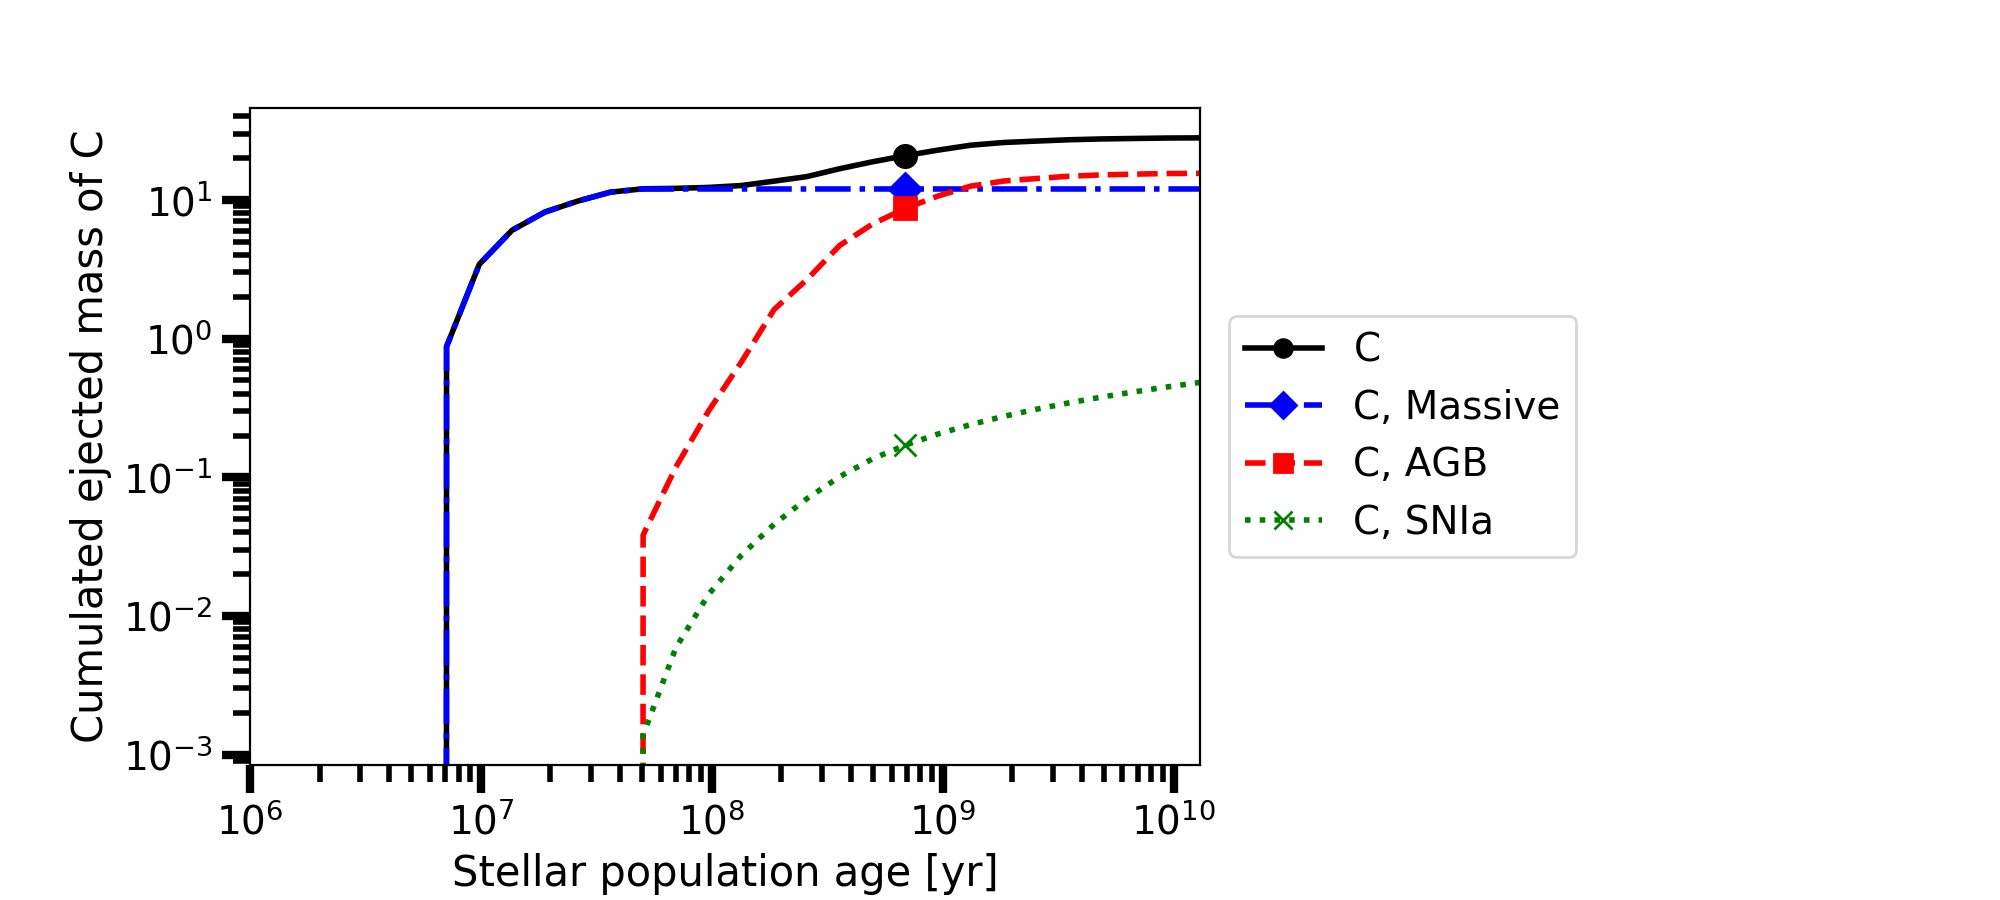

Text(0,0.5,'Cumulated ejected mass of C')

In [14]:
%matplotlib nbagg
s_0_01.plot_mass(specie=specie)
s_0_01.plot_mass(specie=specie, source='massive')
s_0_01.plot_mass(specie=specie, source='agb')
s_0_01.plot_mass(specie=specie, source='sn1a')
plt.xlabel('Stellar population age [yr]')
plt.ylabel('Cumulated ejected mass of '+specie)
#plt.xscale('linear')
#plt.ylim(1e3,6e7)